In [6]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print(pd.__version__)

0.25.1


In [8]:
print(sklearn.__version__)

0.21.3


In [10]:
titanic_df = pd.read_csv("./datasets/titanic_train.csv")

In [12]:
type(titanic_df)

pandas.core.frame.DataFrame

In [14]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sibsp - no of siblings travelled along with a passenger    


Parch - no of parent/child travelled with a passenger

In [15]:
titanic_df.shape

(891, 12)

In [16]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

drop irrelavant columns

In [17]:
titanic_df.drop(columns = ['PassengerId','Name','Ticket','Cabin'], inplace =True)

In [18]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Class,Age,Sex are important features

In [ ]:
titanic_df.isna().sum()

In [19]:
titanic_df.dropna(inplace = True)
titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Mean of Survived(has boolean values) has value of 0.40 indicating that only 40% survived the titanic disaster.

Average age of passengers was 30, indicating a lot of young passengers

Min age was 0.42 indicates a child of a few months, states there were children aboard.

### VISUALIZATION

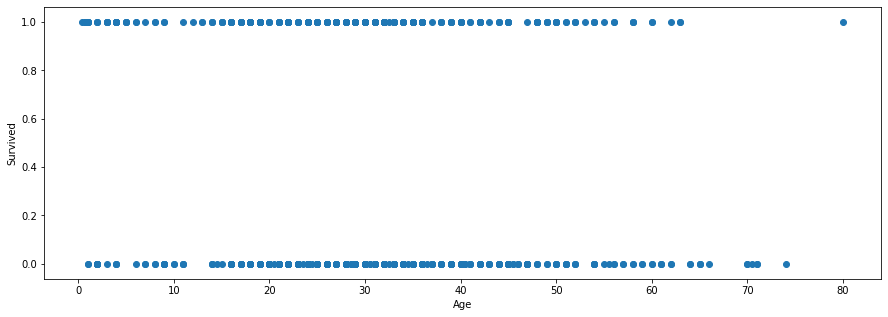

In [21]:
fig , ax = plt.subplots(figsize=(15,5))
plt.scatter(titanic_df['Age'],titanic_df['Survived'])

plt.xlabel("Age")
plt.ylabel("Survived")

plt.show()

looking at the visualization. we can hardly say if a passenger survived or not by considering the age feature

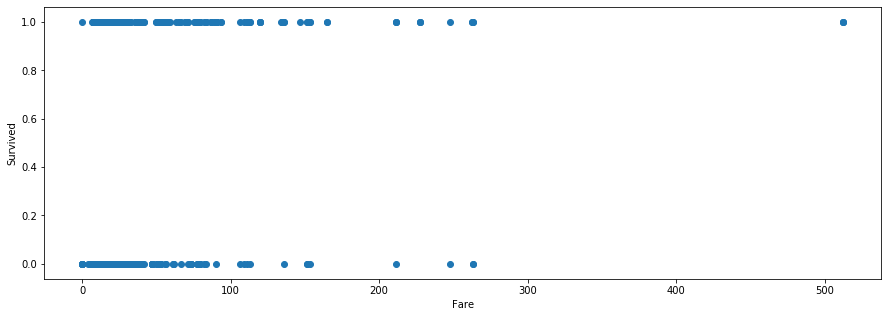

In [22]:
fig , ax = plt.subplots(figsize=(15,5))
plt.scatter(titanic_df['Fare'],titanic_df['Survived'])

plt.xlabel("Fare")
plt.ylabel("Survived")

plt.show()

Even though most of the points are clustered below 100, we can see some outlier values which paid 

Pairwise relationship using scatterplots are not very useful since it is a binary classification problem

In [23]:
pd.crosstab(titanic_df['Sex'],titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


clearly women has more survival rate and cross tab is abetter way to view this data.

In [24]:
pd.crosstab(titanic_df['Pclass'],titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


First class passengers were given preference on the lifeboats

Almost 50 % of second class passengers survived.

Third class passengers have a very low survival rate . only 22% of them survived

To find <b><u>interrelationship</u></b> among features, lets check correlation

In [25]:
f_corr = titanic_df.corr()

f_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


The Pclass indicates a negative correlation as number 3 is considered to be higher when compared to other values for the feature.  This basically says that as the passenger class gets high , survival chance gets lower.

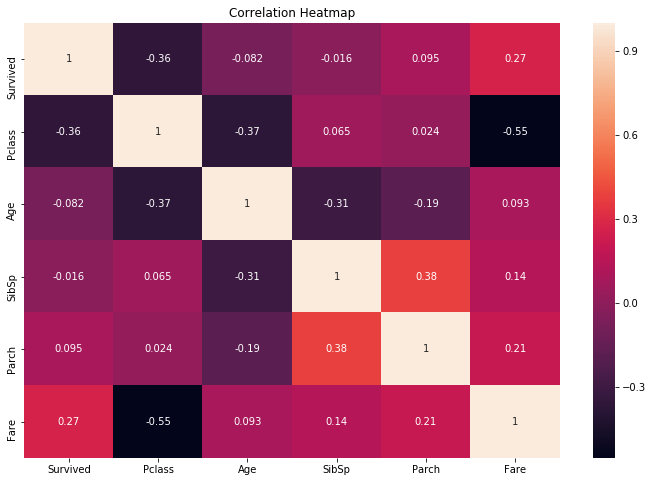

In [26]:
fig , ax = plt.subplots(figsize=(12,8))
sns.heatmap(f_corr,annot = True)

plt.title("Correlation Heatmap")
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()

Notes : 
    - passenger fare has strong -ve correlation with Pclass : as class goes down(3->1), fare  goes up

### Label Encoding

Convert categorical variables to ordered integer values to use in ML algorithms

There are different ways to convert discrete/categorical variables to numeric form and the method we choose will depend on what the categories represent .

The label encoder is typically used with ordinal variables which has an intrinsic order 

Also when we have binary data such as gender, it it ok to use label encoding even though it doesn't have an intrinsic order - but note to convert its type to str.

In [ ]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))

In [ ]:
titanic_df.head()

In [ ]:
label_encoding.classes_ #will give you the actual classes of the encoded values

Categorical values with no intrinsic order can also be converted to numeric form using one-hot encoding by calling getdummies funtion in pandas

In [ ]:
titanic_df = pd.get_dummies(titanic_df,columns = ['Embarked'])
titanic_df.head()

To indroduce randomness (avoid any ordering in data),we can shuffle the records in the dataset

we can do shuffling by invoking the sample function in pandas and giving 1 as input for fraction argument so that all the records in the data will be sampled. (fraction of 0.2 means 20% and 1 means 100%)

In [ ]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)

In [ ]:
titanic_df.head()

Its impoert to feed in data to ML model in a shuffled form. Epecially true in case of neural networks models. Shuffling ensures that our model doesn't inadvertently pickup any patterns in the ordering of dataset.

Now that our data is ready to be fed into ML model, we can now save this data to a csv file.

In [ ]:
titanic_df.to_csv('./datasets/titanic_processed.csv',index=False)

In [ ]:
!dir datasets

Goto Notebook-2